In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
data = pd.read_csv('../../data/bikes_rent.csv')

In [17]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


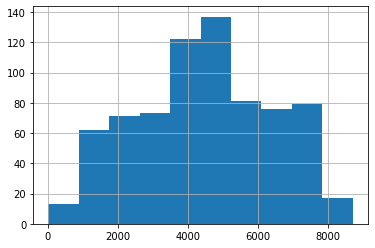

In [18]:
data['cnt'].hist();

In [5]:
X_df, y_series = data.drop('cnt', axis=1), data['cnt']

In [6]:
X_df.shape

(731, 12)

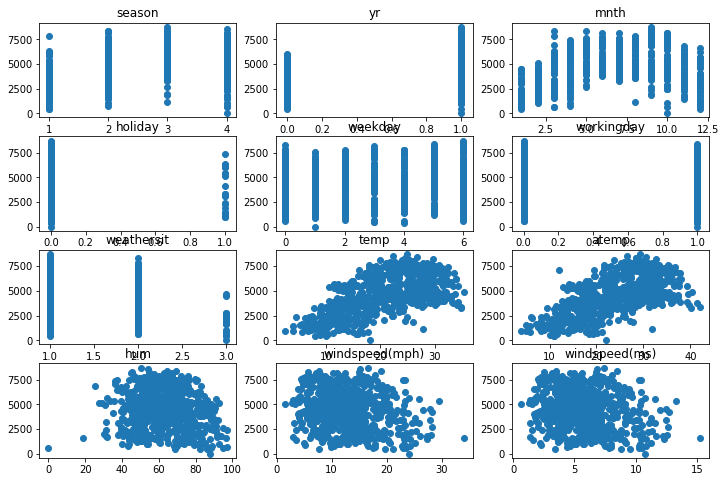

In [7]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(X_df.columns):
    plt.subplot(4, 3, i + 1)
    plt.scatter(X_df[col], y_series)
    plt.title(col);

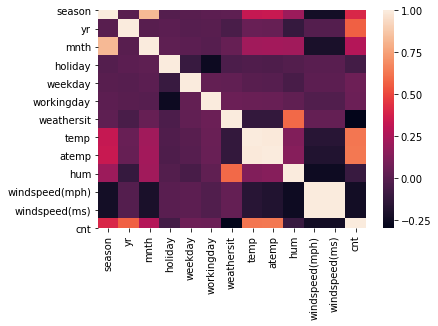

In [9]:
sns.heatmap(data.corr());

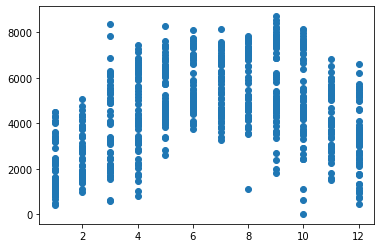

In [13]:
plt.scatter(data['mnth'], data['cnt']);

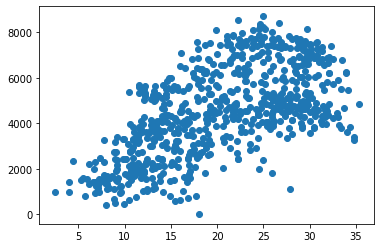

In [15]:
plt.scatter(data.temp, data.cnt);

Можно добавить квадрат признаков mnth и temp

In [19]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, \
                                Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [20]:
linreg = LinearRegression()
lasso = Lasso(random_state=17)
ridge = Ridge(random_state=17)
lasso_cv = LassoCV(random_state=17)
ridge_cv = RidgeCV()

In [25]:
X, y = data.drop('cnt', axis=1).values, data['cnt'].values

In [28]:
train_part_size = int(0.7 * X.shape[0])

X_train, X_valid = X[:train_part_size, :], X[train_part_size:, :]
y_train, y_valid = y[:train_part_size], y[train_part_size:]

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [33]:
linreg.fit(X_train_scaled, y_train)
np.sqrt(mean_squared_error(y_valid, linreg.predict(X_valid_scaled)))

1121.7956042805881

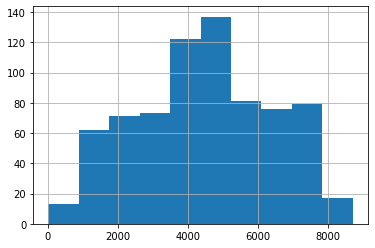

In [36]:
data['cnt'].hist();

In [41]:
pd.DataFrame(linreg.coef_, data.columns[:-1], 
             columns=['coef']).sort_values(by='coef', ascending=False)

,coef
windspeed(ms),3.051929e+12
yr,9.540698e+02
atemp,8.911692e+02
season,4.048590e+02
weekday,1.037119e+02
temp,6.248868e+01
mnth,3.080908e+01
workingday,1.470250e+01
holiday,-6.757468e+01
hum,-1.589772e+02


In [58]:
def train_validate_report(model, X_train, y_train,
                         X_valid, y_valid, feature_names):
    model.fit(X_train, y_train)
    error = np.sqrt(mean_squared_error(y_valid, model.predict(X_valid)))
    print('MSE =',error)
    print('Веса для модели')
    print(pd.DataFrame(model.coef_, feature_names, 
             columns=['coef']).sort_values(by='coef', ascending=False))

In [59]:
train_validate_report(lasso, X_train_scaled, y_train,
                     X_valid_scaled, y_valid,
                     feature_names=data.columns[:-1])

MSE = 1120.7214094932299
Веса для модели
                      coef
yr              952.804560
atemp           877.159813
season          403.416439
weekday         102.643044
temp             75.953962
mnth             29.857599
workingday       14.173377
windspeed(ms)    -0.000000
holiday         -67.073435
hum            -157.547615
windspeed(mph) -187.341353
weathersit     -293.177257


In [60]:
train_validate_report(lasso_cv, X_train_scaled, y_train,
                     X_valid_scaled, y_valid,
                     feature_names=data.columns[:-1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


MSE = 1241.8232609267025
Веса для модели
                      coef
atemp           886.374386
yr              784.305733
season          272.280614
weekday          12.617944
mnth              0.000000
holiday          -0.000000
workingday        0.000000
temp              0.000000
windspeed(ms)    -0.000000
hum              -9.823886
windspeed(mph)  -77.728632
weathersit     -279.739913


In [62]:
train_validate_report(ridge, X_train_scaled, y_train,
                     X_valid_scaled, y_valid,
                     feature_names=data.columns[:-1])

MSE = 1119.5605202108363
Веса для модели
                      coef
yr              954.075878
atemp           730.747340
season          400.114172
temp            221.406072
weekday         103.198680
mnth             34.687740
workingday       15.334339
holiday         -69.046689
windspeed(ms)   -95.819798
windspeed(mph)  -95.819798
hum            -157.702520
weathersit     -293.899386


In [64]:
train_validate_report(ridge_cv, X_train_scaled, y_train,
                     X_valid_scaled, y_valid,
                     feature_names=data.columns[:-1])

MSE = 1118.9035433219983
Веса для модели
                      coef
yr              934.401985
atemp           534.482125
temp            410.485392
season          375.585733
weekday         100.838401
mnth             48.142392
workingday       16.165284
holiday         -70.019251
windspeed(ms)   -97.770430
windspeed(mph)  -97.770430
hum            -155.174377
weathersit     -291.035853


In [13]:
ols = LinearRegression(normalize=True)

In [16]:
train_share = 0.7

train_part_len = int(train_share * data.shape[0])

X_train  = X_df.values[:train_part_len, :]
X_valid = X_df.values[train_part_len:, :]
y_train  = y_series.values[:train_part_len]
y_valid = y_series.values[train_part_len:]

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
ols.fit(X_train, y_train)

/Users/y.kashnitsky/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [30]:
beatiful_coef(ols.coef_, feature_names=X_df.columns)

,coef
windspeed(ms),1.298986e+12
yr,2.111924e+03
season,3.737384e+02
atemp,1.113783e+02
weekday,5.185598e+01
workingday,3.170166e+01
mnth,9.011048e+00
temp,8.536614e+00
hum,-1.043749e+01
holiday,-4.139608e+02


In [33]:
ridge = Ridge(random_state=17, normalize=True)

In [34]:
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=17, solver='auto', tol=0.001)

In [38]:
beatiful_coef(ridge.coef_)

,coef
yr,893.471708
season,122.291657
workingday,44.899153
temp,43.335021
atemp,40.730731
weekday,23.657447
mnth,16.580342
hum,-6.019385
windspeed(mph),-14.569916
windspeed(ms),-32.592903


In [41]:
ridge_valid_pred = ridge.predict(X_valid)

In [42]:
rmse(y_valid, ridge_valid_pred)

1694.1963161505425

In [48]:
alphas = np.logspace(-4, 4, 100)

In [49]:
ridge_cv = RidgeCV(alphas=alphas,
                   cv=5, normalize=True).fit(X_train, y_train)

In [51]:
ridge_cv.alpha_

0.012618568830660211

In [52]:
best_ridge_valid_pred = ridge_cv.predict(X_valid)

In [53]:
rmse(y_valid, best_ridge_valid_pred)

1118.8033866081003

In [55]:
lasso = LassoCV(alphas=alphas, cv=5, normalize=True).fit(X_train, y_train)

In [56]:
lasso.alpha_

0.09770099572992257

In [58]:
best_lasso_valid_pred = lasso.predict(X_valid)

In [59]:
rmse(y_valid, best_lasso_valid_pred)

1120.7599048718084

In [60]:
beatiful_coef(lasso.coef_)

,coef
yr,2104.016880
season,371.889534
atemp,110.702588
weekday,50.803375
workingday,28.492832
temp,9.100711
mnth,8.227825
windspeed(ms),-0.000000
hum,-10.225836
windspeed(mph),-35.387183


In [61]:
beatiful_coef(ridge_cv.coef_)

,coef
yr,2086.883298
season,354.849868
atemp,70.048003
temp,52.872890
weekday,50.868024
workingday,34.406998
mnth,12.867755
hum,-10.225210
windspeed(mph),-18.579682
windspeed(ms),-41.562749


In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
forest = RandomForestRegressor(n_estimators=100, random_state=17)

In [64]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=17, verbose=0, warm_start=False)

In [65]:
forest_valid_pred = forest.predict(X_valid)

In [66]:
rmse(y_valid, forest_valid_pred)

1053.8080862607937

In [67]:
beatiful_coef(forest.feature_importances_)

,coef
temp,0.324132
atemp,0.216861
yr,0.200795
hum,0.067893
season,0.064054
weathersit,0.032349
mnth,0.028291
windspeed(ms),0.020298
weekday,0.018796
windspeed(mph),0.017695
